# Setup

In [1]:
import sys
sys.path.append('/home/arnisaf/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [30]:
# load baselines: filename!!
with open('results/cifarstyle_baselines_freeze_True_pool_True_random.json', 'r') as f:
    baselines = json.load(f)
baselines = baselines[1:]

# load results; filename
with open('results/cifarstyle_fashion_random.json', 'r') as f:
    results = json.load(f)

# Run this if the first element of the results is the PARAMS dict
params = results[0]
results = results[1:]
# if not, initialize a params dict -see 3. Init params

data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.866667,0.817500
1,0.001,0.001,-1,1,1.000000,0.916278
2,0.001,0.001,-1,2,0.933333,0.872667
3,0.001,0.001,-1,3,1.000000,0.894389
4,0.001,0.001,-1,4,1.000000,0.882167


In [3]:
# Filter the baselines to these percentages: 0.001, 0.01, 0.1, 0.5, 1.0
# because there are some extra percentages
baselines = [result for result in baselines if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]

results = [result for result in results if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]
data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.866667,0.810000
1,0.001,0.001,-1,1,0.933333,0.789000
2,0.001,0.001,-1,2,0.933333,0.808000
3,0.001,0.001,-1,3,0.866667,0.813000
4,0.001,0.001,-1,4,0.933333,0.807333


In [31]:
df_empirical = df.copy()

In [25]:
df_other = df.copy()

In [ ]:
# OR LOAD ARI Scores
with open("results/ari_scores/ari_scores_finetuned.json", "r") as f:
    ari_scores_all = json.load(f)
df_ari = pd.DataFrame(ari_scores_all)

# Display the DataFrame (showing the first few rows for brevity)
df_ari.head()

# 1. The plots
See the documentation (mp-tl-study/example_visualizations.ipynb) for a full list of supported visualizations

### Experimental Plots

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if ther

Freeze = True, Reinitialize = True, Pooling = True, Learning rate = 0.001


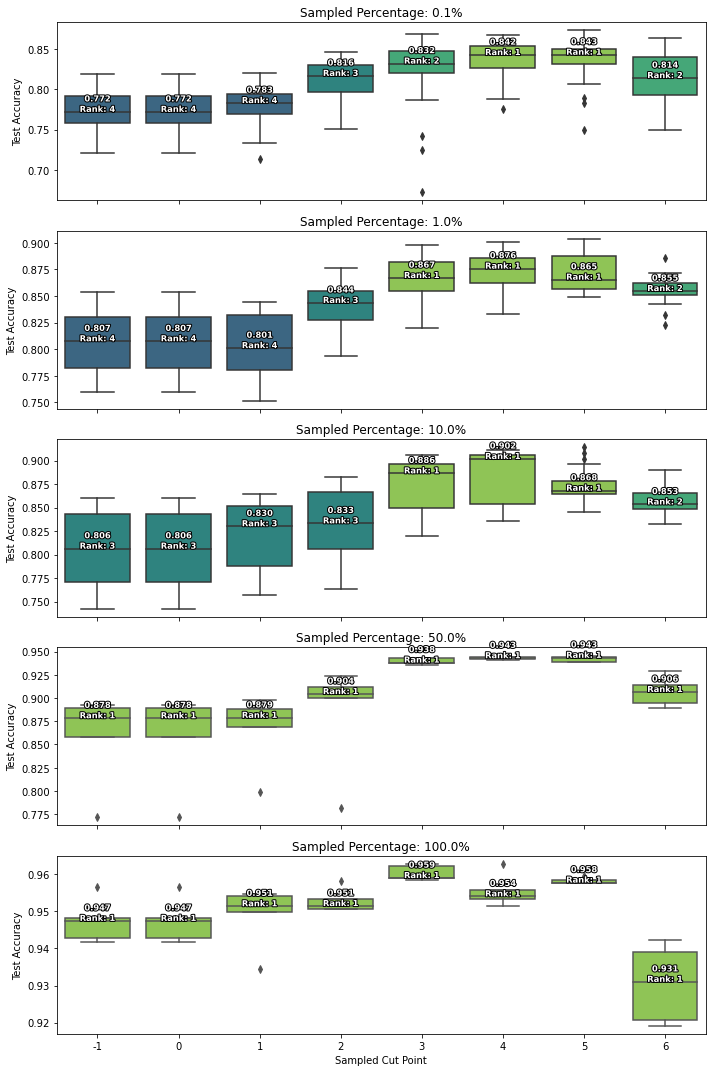

In [4]:
# run statistical tests below to get the df_rankings
_, df_rankings = get_rankings(df=df_empirical)
ranks_sorted = box_plot(df=df_empirical, rank_df=df_rankings, params=params, add_baseline=False)

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


     Percentage  Cut Point 1  Cut Point 2  statistic   p_value  is_significant
0         0.001           -1            0      117.0  0.230361           False
1         0.001           -1            1       58.0  0.003781            True
2         0.001           -1            2       49.0  0.001453            True
3         0.001           -1            3      136.0  0.490786           False
4         0.001           -1            4       59.0  0.004175            True
..          ...          ...          ...        ...       ...             ...
135       1.000            3            5        0.0  0.062500           False
136       1.000            3            6        0.0  0.062500           False
137       1.000            4            5        1.0  0.125000           False
138       1.000            4            6        0.0  0.062500           False
139       1.000            5            6        0.0  0.062500           False

[140 rows x 6 columns]
Freeze = True, Reinitialize 

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

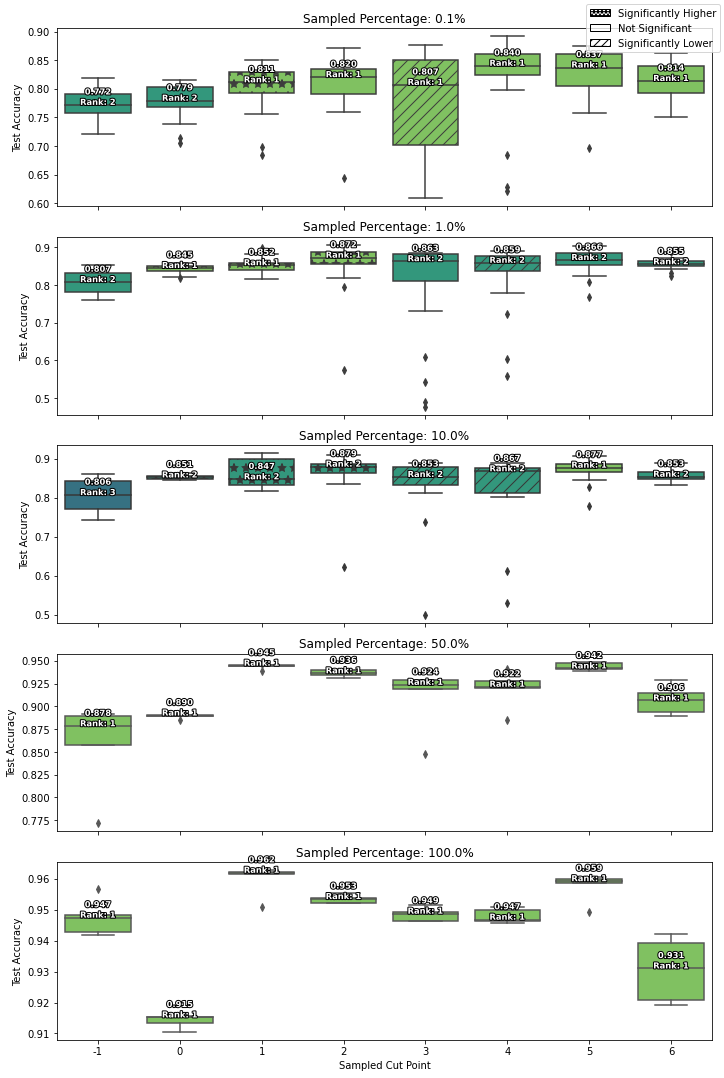

In [19]:
# run statistical tests below to get the df_rankings
_, df_rankings = get_rankings(df=df_other)
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_other = df_other.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_other = stats_other.reset_index()
stats_other.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > df_rankings_other.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_other.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['rank'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_other['rank'] = df_rankings_other['Mean Test Accuracy'].astype(int)
box_plot(df=df_other, rank_df=df_rankings, params=params, pairwise_rank_df=df_rankings_other, pairwise=True)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

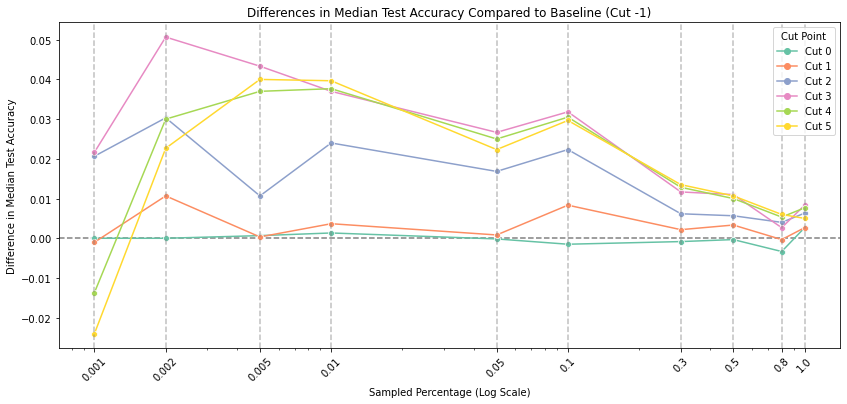

In [7]:
compare_to_baseline_line_plot(df)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

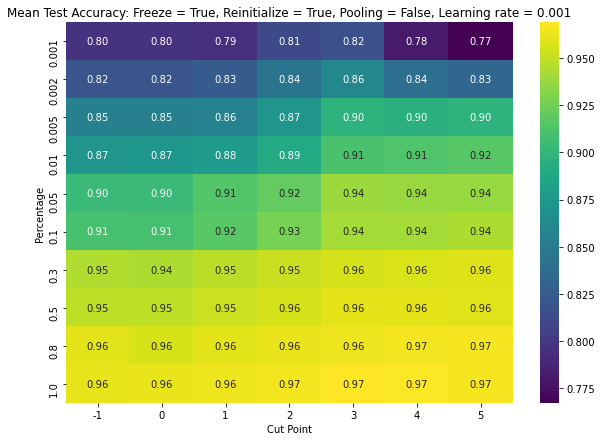

In [13]:
heatmap(df, params, figsize=(10,7))

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

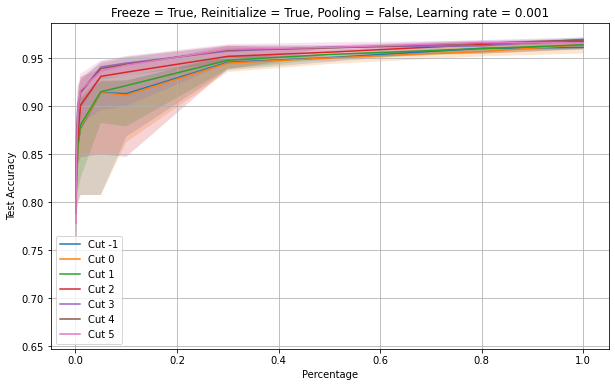

In [15]:
line_pilot_with_ranges(df, params)

### ARI Box Plots

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

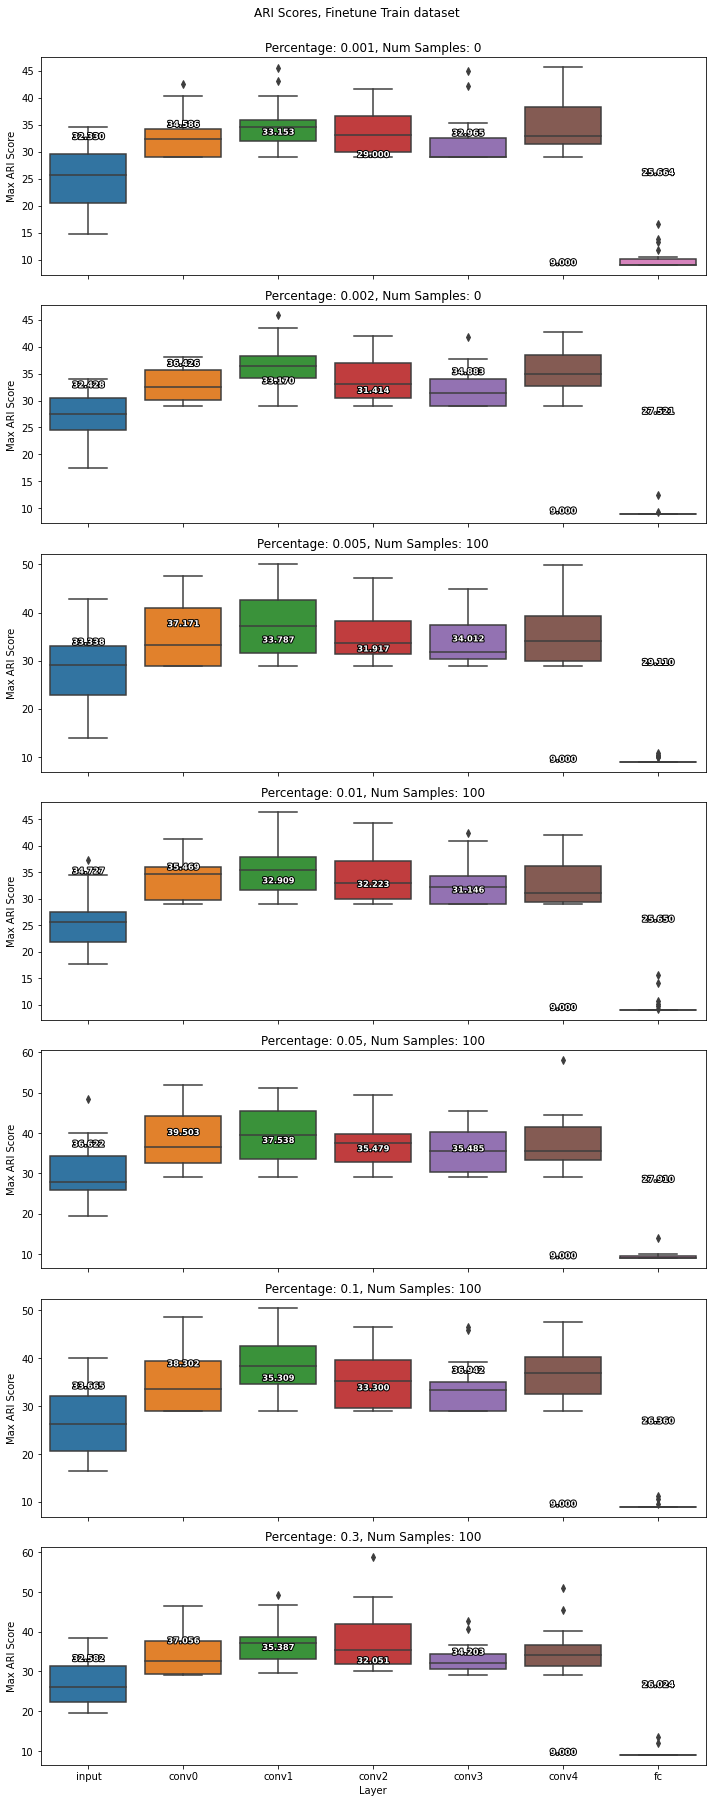

In [16]:
layer_names = ["input", 'conv0', 'conv1', 'conv2', 'conv3', 'conv4', 'fc']
plot_ARI_scores_percentages(df_ari, dataset="Finetune", split="Train", order=layer_names, figsize=(10,25))

# 2. Statistical Tests

### Pairwise Comparison between two plots

In [26]:
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
stats_empirical = calculate_statistics(df_empirical)
stats_other = calculate_statistics(df_other)

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > stats_other.iloc[i]['Mean Test Accuracy']:
            df_wilcoxon_pairwise.loc[i, "Higher"] = "truncate=False"
        else:
            df_wilcoxon_pairwise.loc[i, "Higher"] = "truncate=True"
        # print(df_wilcoxon_pairwise)
    else:
        df_wilcoxon_pairwise.loc[i, "Higher"] = "None"

# every row: is the percentage and cut significantly different between the two box plots
df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    row = row.split(" & ")
    row = " & ".join([str(float(row[0].lstrip())*100)[:5]] + row[1:4] + row[-1:])
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        # split row with respect to " & ", take the 5th value, encapsulate it in \textbf{} and join them back
        row = "\\rowcolor{green!20}\n" + row
    rows[i] = row

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

In [27]:
print(latex_table)

0.1 &         -1 &          0 & 1.000000 &          None \\
0.1 &          0 &        117 & 0.230361 &          None \\
\rowcolor{green!20}
0.1 &          1 &         74 & 0.015973 &  reinit=False \\
0.1 &          2 &        146 & 0.672075 &          None \\
\rowcolor{green!20}
0.1 &          3 &         84 & 0.034174 &  reinit=False \\
0.1 &          4 &        162 & 1.000000 &          None \\
0.1 &          5 &        121 & 0.275184 &          None \\
0.1 &          6 &          0 & 1.000000 &          None \\
1.0 &         -1 &          0 & 1.000000 &          None \\
\rowcolor{green!20}
1.0 &          0 &          6 & 0.000001 &  reinit=False \\
\rowcolor{green!20}
1.0 &          1 &          1 & 0.000000 &  reinit=False \\
\rowcolor{green!20}
1.0 &          2 &         71 & 0.012466 &  reinit=False \\
1.0 &          3 &         93 & 0.062626 &          None \\
\rowcolor{green!20}
1.0 &          4 &         66 & 0.008069 &   reinit=True \\
1.0 &          5 &        137 & 0.507704

### Tables for Ranking Cuts

In [32]:
df_wilcoxon_pairwise, _ = get_rankings(df=df_empirical)

df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")
# print(latex_table)
# TODO: next, \text{p-value if significant}
# iterate over both the rows in the latex table string and the df_wilcoxon_pairwise
# if the row is significant, add the p-value to the latex table string
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    # print(row)
    row = row.split(" & ")   
    # print(float(row[0].lstrip())*100)
    row = " & ".join([str(float(row[0].lstrip())*100)[:5]] + row[1:-1])
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        row = "\\rowcolor{green!20}\n" + row
    
    rows[i] = row + " \\\\"

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if ther

In [33]:
print(latex_table)

0.1 &           -1 &            0 &          0 & 1.000000 \\
0.1 &           -1 &            1 &        127 & 0.352520 \\
\rowcolor{green!20}
0.1 &           -1 &            2 &         11 & 0.000003 \\
\rowcolor{green!20}
0.1 &           -1 &            3 &          1 & 0.000000 \\
\rowcolor{green!20}
0.1 &           -1 &            4 &          4 & 0.000000 \\
\rowcolor{green!20}
0.1 &           -1 &            5 &         23 & 0.000038 \\
\rowcolor{green!20}
0.1 &           -1 &            6 &         25 & 0.000054 \\
0.1 &            0 &            1 &        127 & 0.352520 \\
\rowcolor{green!20}
0.1 &            0 &            2 &         11 & 0.000003 \\
\rowcolor{green!20}
0.1 &            0 &            3 &          1 & 0.000000 \\
\rowcolor{green!20}
0.1 &            0 &            4 &          4 & 0.000000 \\
\rowcolor{green!20}
0.1 &            0 &            5 &         23 & 0.000038 \\
\rowcolor{green!20}
0.1 &            0 &            6 &         25 & 0.000054 \\
\rowcol

# 3. Extras
Don't forget to change the flags to the correct ones for the titles in the params!

### Extra 1: Split the dictionaries into baseline and fine-tuning one
only run when necessary

In [14]:
with open('results/results_freeze_True_reinit_True_pool_False_random_classes.json', 'r') as f:
    data_dicts = json.load(f)

params = data_dicts[0]
baselines = [params]
results = [params]
for row in data_dicts[1:]:
    if row["sampled_cut_point"] == -1:
        baselines.append(row)
    else:
        results.append(row)

with open(f'results/baselines_freeze_True_reinit_True_pool_False_truncate_False_3_layers_random_classes.json', 'w') as f:
    json.dump(baselines, f)
with open(f'results/results_freeze_True_reinit_True_pool_False_truncate_False_3_layers_random_classes.json', 'w') as f:
    json.dump(results, f)